In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

## Problema 2

In [15]:
def LeerArchivo(url):
    file=requests.get(url)
    datos=file.text
    datos=datos.split('\n')[3:-1]
    mat=[]
    for x in datos:
        s=x.split('\t')
        print(s)
        mat.append([float(a)for a in s])
    mat=np.array(mat)
    return mat

['100', '33.258', '149.500', '216.485', '-6.698', '-69.644', '-64.353', '33.615']
['200', '33.473', '172.577', '189.418', '-3.368', '-72.027', '-58.161', '15.190']
['250', '34.216', '180.113', '186.829', '-1.679', '-73.426', '-54.536', '11.395']
['298.15', '35.639', '186.251', '186.251', '0.', '-74.873', '-50.768', '8.894']
['300', '35.708', '186.472', '186.252', '0.066', '-74.929', '-50.618', '8.813']
['350', '37.874', '192.131', '186.694', '1.903', '-76.461', '-46.445', '6.932']
['400', '40.500', '197.356', '187.704', '3.861', '-77.969', '-42.054', '5.492']
['450', '43.374', '202.291', '189.053', '5.957', '-79.422', '-37.476', '4.350']
['500', '46.342', '207.014', '190.614', '8.200', '-80.802', '-32.741', '3.420']
['600', '52.227', '215.987', '194.103', '13.130', '-83.308', '-22.887', '1.993']
['700', '57.794', '224.461', '197.840', '18.635', '-85.452', '-12.643', '0.943']
['800', '62.932', '232.518', '201.675', '24.675', '-87.238', '-2.115', '0.138']
['900', '67.601', '240.205', '20

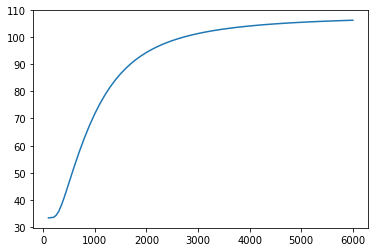

In [16]:
mat=LeerArchivo("https://janaf.nist.gov/tables/C-067.txt")
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

In [17]:
T=T[3:16]  ## se utiliza para determinar la temperatura esperada dentro del arreglo anterior
y=Cp[3:16] 
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(beta)
Cp_cal=X.dot(beta)
Cp_cal #Cp calculada

[ -0.42317857 107.50201452 -41.34537789   5.39384261   0.67123974]


array([35.64723293, 35.71019482, 37.84848678, 40.50282106, 43.38656698,
       46.35067349, 52.22331893, 57.78896146, 62.92785071, 67.59968071,
       71.79854041, 75.53507826, 78.82859344])

In [18]:
Cp_calc=beta.dot(X.T) 

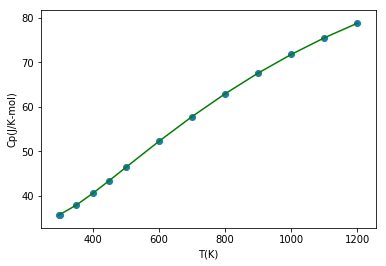

In [19]:
plt.plot(T,Cp_calc,color="green")
plt.scatter(T,y)
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()

In [20]:
## caLculos CH4
A=-0.42317857
B=107.50201452
C=-41.34537789
D=5.39384261
E=0.67123974

deltaH_298=186.251
deltaS_298=-74.873

dT=0.1
T=np.arange(298,1200,dT)
t=T/1000
Cp_CH4=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_CH4=np.cumsum(Cp_CH4*dT)+deltaH_298*1000
deltaS_CH4=np.cumsum(Cp_CH4/T*dT)+deltaS_298
deltaG_CH4=deltaH_CH4-T*deltaS_CH4

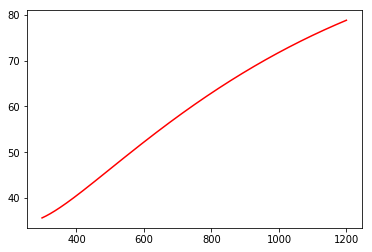

In [21]:
##Grafica T Vs Cp_calc
dT=0.1
T=np.arange(298,1200,dT)
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T  ##Esta x en comparacion va de 0.1 en 0.1(la anterior de 50 en 50)
Cp_calc=X.dot(beta)               
plt.plot(T,Cp_calc,color="red")

plt.show()

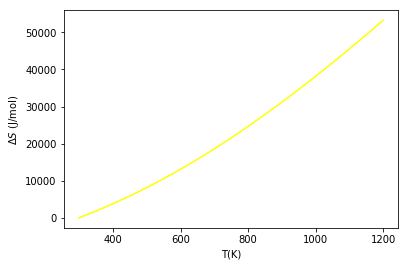

In [22]:
##grafica para la entalpia 
deltaH_CH4=np.cumsum(Cp_calc*dT)  
plt.plot(T,deltaH_CH4,color="yellow")
plt.xlabel("T(K)")
plt.ylabel(r"$\Delta S$ (J/mol)")
plt.show()

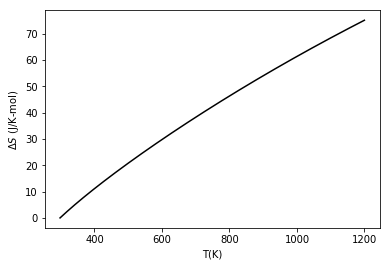

In [23]:
##grafica para entropia
deltaS_CH4=np.cumsum(Cp_calc/T*dT)
plt.plot(T,deltaS_CH4,color="black")
plt.xlabel("T(K)")
plt.ylabel(r"$\Delta S$ (J/K-mol)")
plt.show()

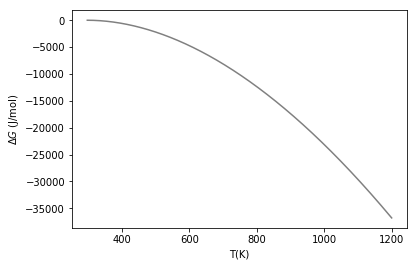

In [24]:
##grafica de G
deltaG_CH4=deltaH_CH4-T*deltaS_CH4
plt.plot(T,deltaG_CH4,color="gray")
plt.xlabel("T(K)")
plt.ylabel(r"$\Delta G$ (J/mol)")
plt.show()

## Problema 2

In [33]:
deltaS_NO=236.761
deltaH_NO=90.381*1000    ##se multiplica por 1000 porque esta en kilos
deltaS_NO2=275.988
deltaH_NO2=31.878*1000
deltaS_O2=231.466
deltaH_O2=0*1000

T=700   ##T en kelvin
pt=200   ##presión total en bar
R=8.314  ##j/k-mol

In [34]:
uNO_est=deltaH_NO-T*deltaS_NO
uNO2_est=deltaH_NO2-T*deltaS_NO2
uO2_est=deltaH_O2-T*deltaS_O2
print(uNO_est,uNO2_est,uO2_est)

-75351.69999999998 -161313.6 -162026.2


In [38]:
x=np.arange(0.001,1,0.001)
n_NO=1-x       ##x es shi 
n_NO2=x
n_O2=(1/2)-(1/2)*x
nt=(3/2)-(1/2)*x

X_NO=n_NO/nt
X_NO2=n_NO2/nt
X_O2=n_O2/nt

In [39]:
uNO=uNO_est+R*T*np.log(X_NO)
uNO2=uNO2_est+R*T*np.log(X_NO2)
uO2=uO2_est+R*T*np.log(X_O2)
uT=n_NO*uNO+n_NO2*uNO2+n_O2*uO2

[0.509]


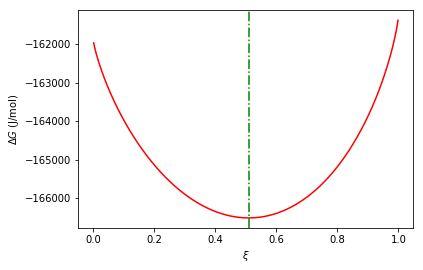

In [45]:
minimo=np.min(uT)
n=np.where(minimo==uT)
xeq=x[n]
print(xeq)


plt.plot(x,uT,color="red")
plt.axvline(x=xeq,color="green",linestyle="-.")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\Delta G$ (J/mol)")

plt.show()

In [46]:
pNO2=((xeq)/((3/2)-(1/2)*xeq))*pt
pNO=(1-xeq/((3/2)-(1/2)*xeq))*pt
pO2=(((1/2)-(1/2)*xeq)/((3/2)-(1/2)*xeq))*pt

Kp=((pNO2)/(pNO*pO2**(1/2)))
print(Kp)

[0.11007182]


## Problema 3

In [53]:
def secuenciaADN(i):
    a = np.arange(4)
    cad=(np.random.choice(a, i, replace=True))
    sec=str(cad)
    sec1=sec.replace('0','A')
    sec2=sec1.replace('1','T')
    sec3=sec2.replace('2','C')
    sec4=sec3.replace('3','G')
    return(sec4)

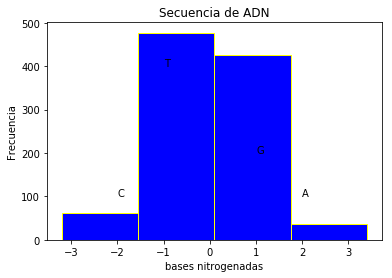

[G T G C A G A C C T C A A C T C T G T G C A T T G A T T G G C T A C T A C
 C A A A T G C T T C C T T T T C G A T T T G G A A C C C C T A G C A T A C
 A T G A T G C T T G C A A C T A G T A G T G T G C G G A C C A C A G G A G
 G T C T T G C A G G A T C A A G G T C T A G G A C A G T T A T G C T T A A
 A G C C T G T T C C T G A C C C G C C T T G T T T G T C T T T T A C T A C
 T T C T T A A C C T G C A C C C C C C A C A A A T G T C A T C A C A A G A
 G T A G C C C C C T C G C A T T A C T G T C A G T G T C T C C G G T G T A
 T G G T G T A C T T G C T T A G A T C G T G A C A T G A T T G T C G G G A
 G G T C T A T T G A T T T T C T G C G G C C A G A G T C G T C G A A T A A
 G C T A G T C T T G A G T T A C A A G C A G A C G T G G T T A A A G C T T
 C A G G G A G G C G T C C C C C A C T A A T C T C G A C C T C A C A C G G
 T A C G A A C C G A A T A A A G G T A A G A T A G C G T C A A G G C C T T
 A G C C T G G T A A C C T C G C T A C G G A C A C T C G A C C G G A G T A
 T C C C A T A A C C T C 

In [56]:
x=secuenciaADN(1000)
y=x[1]

y=np.random.randn(1000)
plt.hist(y,bins=4, facecolor='blue', edgecolor='yellow',density=False)
plt.title('Secuencia de ADN')
plt.xlabel('bases nitrogenadas')
plt.ylabel('Frecuencia')
plt.text(2,100,'A')
plt.text(-2,100,'C')
plt.text(-1,400,'T')
plt.text(1,200,'G')
plt.show()
print(x)